
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE2802 - AI2000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each with a diagonal covariance matrix with diagonal elements being 0.1. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.

2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Develop a Python class named 'KNeighbourClassifier' that encapsulates the hyperparameters of a K-Nearest Neighbors (KNN) classifier, such as the number of neighbors (k) and the distance metric. Implement the following methods within this class. $\textit{fit(X_train, y_train):}$ This method should accept training data (X_train) and corresponding labels (y_train) as input. It should store these inputs as internal attributes of the class for later use in prediction. $\textit{predict(X_test):} This method should take test data (X_test) as input and return the predicted labels for the given data points using the KNN algorithm.

2. Instantiate an object of the KNeighbourClassifier class. Train the classifier on the provided training data by calling the fit() method. Use this trained classifier to predict the labels of the test data. Finally, evaluate the classifier's accuracy by comparing the predicted labels with the actual (original) labels of the test data

3. Generate a 2D scatter plot of the test data, assigning green to class 1, blue to class 2, and red to test data points whose predicted labels do not match their true labels.

4. Visualize the decision boundaries of a given classifier by generating a 2D grid and predicting the class labels for each point in the grid using the KNN algorithm. Color-code the grid points based on their predicted class labels to visually represent the decision regions

<b> Part(c): Parameter selection: What is good value for k? - </b> A common approach to finding the optimal value for the hyperparameter 'k' in K-Nearest Neighbors is through cross-validation. In this method, a portion (ρ%) of the training data is set aside as a validation set. The KNN model is then trained on the remaining data and evaluated on the validation set for a range of 'k' values. The optimal 'k' is selected as the value that results in the best performance on the validation set.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check if there is an improvement on the classification error over the result of Part (b).

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.

2. Investigate how the distribution of the training data affects the performance of the KNN algorithm. Replace the Gaussian distribution used in part (a) with a Laplacian distribution. Generate both training and testing datasets based on these distributions. Evaluate the KNN classifier's performance on both datasets. Analyze whether the KNN achieves comparable performance with both Gaussian and Laplacian distributed data. Examine the effect of changing the distance metric from $l_{2}$ to $l_{1}$ on the KNN performance for both Gaussian and Laplacian distributed datasets


<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> :

1. Use the above written KNN classifier to perform digit claissification using MNIST digit dataset.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%. The 28x28 images in the MNIST data set may be flattened to arrive at a 784 dimensional vector.
3. Use the most suitable distance metric and k to maximize the test data performance.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.



In [55]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
from collections import Counter
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

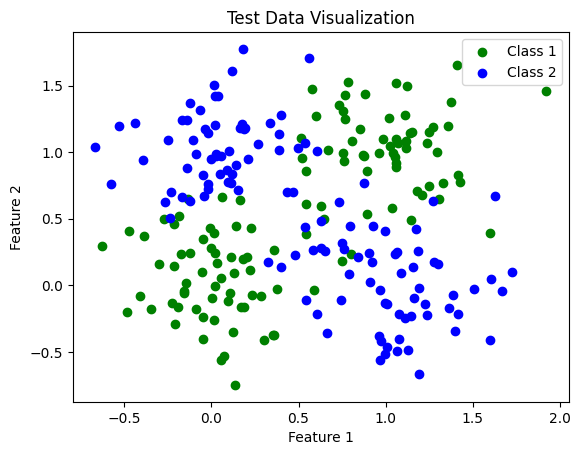

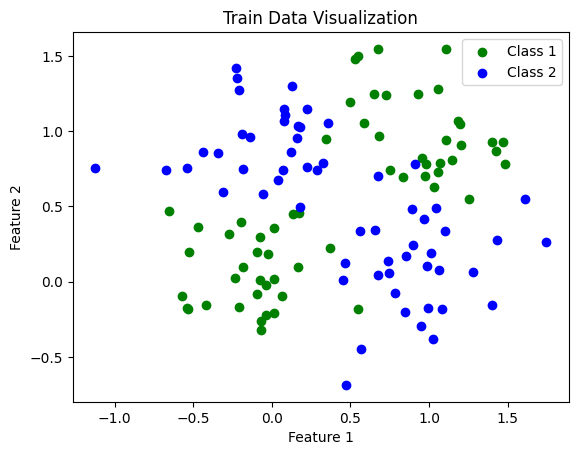

In [56]:
# Part(a): Synthetic data generation

########################################

# Define means and covariances
mean1 = np.array([0, 0])
mean2 = np.array([0, 1])
mean3 = np.array([1, 0])
mean4 = np.array([1, 1])
cov = 0.1 * np.eye(2)

# Sample data points from the bivariate Gaussian distribution
# Generate training data

x_train_00 = np.random.multivariate_normal(mean1, cov, 30)
x_train_01 = np.random.multivariate_normal(mean2, cov, 30)
x_train_10 = np.random.multivariate_normal(mean3, cov, 30)
x_train_11 = np.random.multivariate_normal(mean4, cov, 30)

# Generate testing data

x_test_00 = np.random.multivariate_normal(mean1, cov, 60)
x_test_01 = np.random.multivariate_normal(mean2, cov, 60)
x_test_10 = np.random.multivariate_normal(mean3, cov, 60)
x_test_11 = np.random.multivariate_normal(mean4, cov, 60)

# Create training data and labels
X_train = np.concatenate((x_train_00, x_train_11, x_train_10, x_train_01))
Y_train = np.concatenate((np.ones(30), np.ones(30), -1*np.ones(30), -1*np.ones(30)))

# Create testing data and labels
X_test = np.concatenate((x_test_00, x_test_11, x_test_10, x_test_01))
Y_test = np.concatenate((np.ones(60), np.ones(60), -1*np.ones(60), -1*np.ones(60)))

# Visualize the test data
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='green', label='Class 1')
plt.scatter(X_test[Y_test == -1, 0], X_test[Y_test == -1, 1], c='blue', label='Class 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Data Visualization")
plt.legend()
plt.show()

# Visualize the training data
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c='green', label='Class 1')
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], c='blue', label='Class 2')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Train Data Visualization")
plt.legend()
plt.show()


Accuracy: 87.50%


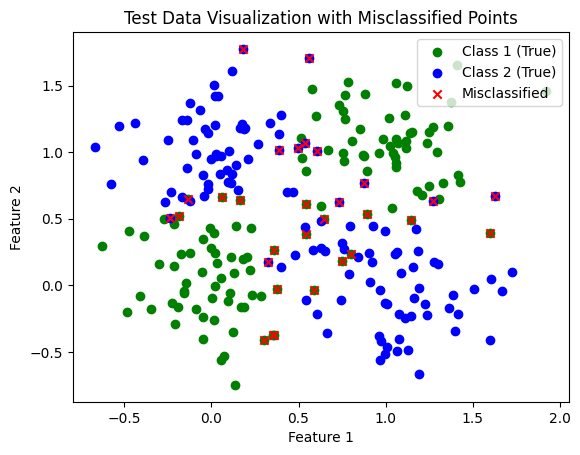

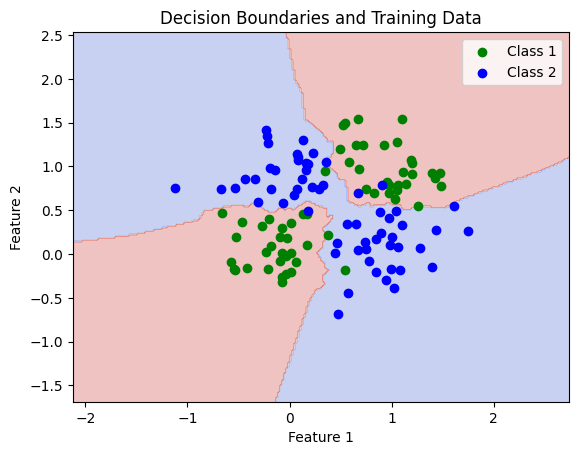

In [57]:
# Part(b): KNN Classification

########################################

class KNeighborsClassifier:
    """
    K-Nearest Neighbors Classifier
    This class implements the k-nearest neighbors algorithm for classification.
    """
    def __init__(self, n_neighbors=5, distance_metric="l2"):
        self.n_neighbors = n_neighbors
        self.distance_metric = distance_metric
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the model using the training data.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate Euclidean distance between two points x1 and x2
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        """
        Calculate Manhattan distance (L1) between two points x1 and x2
        """
        return np.sum(np.abs(x1 - x2))

    def predict(self, X_test):
        """
        Predict the class labels for the test data.
        """
        predictions = []
        for test_point in X_test:
            # Calculate distances from the test point to all points in the training set
            distances = [self.euclidean_distance(test_point, train_point) if self.distance_metric == 'l2' else self.manhattan_distance(test_point, train_point) for train_point in self.X_train]

            # Find the indices of the k closest training points
            k_nearest_neighbors_indices = heapq.nsmallest(self.n_neighbors, range(len(distances)), key=lambda i: distances[i])

            # Get the class labels of the nearest neighbors
            k_nearest_labels = self.y_train[k_nearest_neighbors_indices]

            # Predict the class label as the most frequent label
            most_common = Counter(k_nearest_labels).most_common(1)[0][0]
            predictions.append(most_common)

        return np.array(predictions)


def KNNAccuracy(true, pred):
    """
    Calculate accuracy of the KNN classifier.
    """
    return np.mean(true == pred)

# Instantiate and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3, distance_metric="l2")
knn.fit(X_train, Y_train)

# Predict on test data
predictions = knn.predict(X_test)

# Calculate accuracy
accuracy = KNNAccuracy(Y_test, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the predictions vs actual labels on a scatter plot
plt.scatter(X_test[Y_test == 1, 0], X_test[Y_test == 1, 1], c='green', label='Class 1 (True)', marker='o')
plt.scatter(X_test[Y_test == -1, 0], X_test[Y_test == -1, 1], c='blue', label='Class 2 (True)', marker='o')
plt.scatter(X_test[predictions != Y_test, 0], X_test[predictions != Y_test, 1], c='red', label='Misclassified', marker='x')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Test Data Visualization with Misclassified Points")
plt.legend()
plt.show()

# Visualize decision boundaries

h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c='green', label='Class 1', marker='o')
plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], c='blue', label='Class 2', marker='o')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Decision Boundaries and Training Data")
plt.legend()
plt.show()


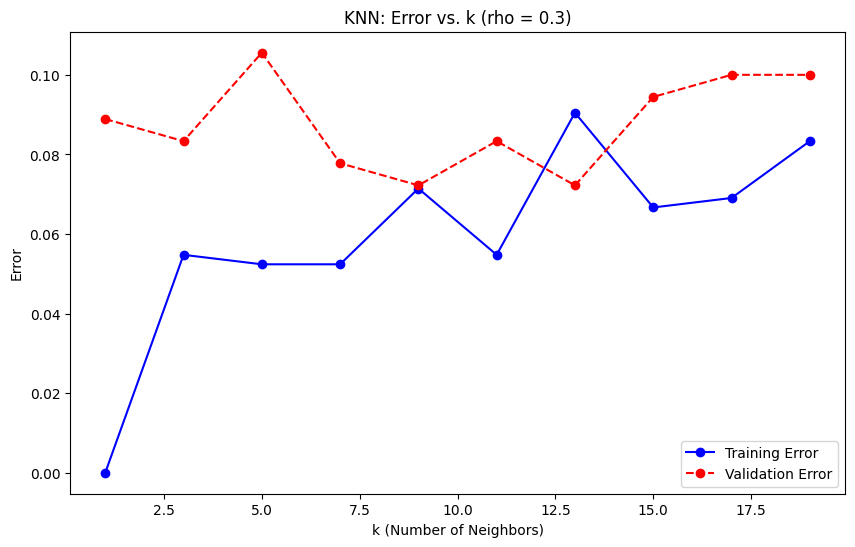

Best k based on validation error: 9
Accuracy with best k on test data: 90.00%


In [58]:
# Part(c): Parameter selection: What is good value for k?

####################################

def holdoutCVkNN(X_train, Y_train, k_range, rho=0.3, repetitions=5):
    train_errors = []
    val_errors = []

    # Number of data points to hold out for validation
    holdout_size = int(rho * len(X_train))

    for k in k_range:
        avg_train_error = 0
        avg_val_error = 0

        for _ in range(repetitions):
            # Shuffle and create holdout set
            indices = np.random.permutation(len(X_train))
            train_indices = indices[holdout_size:]
            val_indices = indices[:holdout_size]

            X_train_split, Y_train_split = X_train[train_indices], Y_train[train_indices]
            X_val_split, Y_val_split = X_train[val_indices], Y_train[val_indices]

            # Instantiate KNN with the current k value
            knn = KNeighborsClassifier(n_neighbors=k, distance_metric="l2")

            # Train KNN
            knn.fit(X_train_split, Y_train_split)

            # Get predictions for training and validation data
            predictions_train = knn.predict(X_train_split)
            predictions_val = knn.predict(X_val_split)

            # Calculate errors using compute_accuracy
            train_error = 1 - KNNAccuracy(Y_train_split, predictions_train)
            val_error = 1 - KNNAccuracy(Y_val_split, predictions_val)

            avg_train_error += train_error
            avg_val_error += val_error

        # Average errors over all repetitions
        avg_train_error /= repetitions
        avg_val_error /= repetitions

        train_errors.append(avg_train_error)
        val_errors.append(avg_val_error)

    return train_errors, val_errors

# Range of k values to test
k_range = range(1, 21, 2)  # Odd values for k, as it's better for multi-class classification

# Holdout fraction (rho)
rho = 0.3  # 30% of data held out for validation

# Perform holdout cross-validation
train_errors, val_errors = holdoutCVkNN(X_train, Y_train, k_range, rho)

# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_errors, label="Training Error", marker='o', linestyle='-', color='b')
plt.plot(k_range, val_errors, label="Validation Error", marker='o', linestyle='--', color='r')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Error')
plt.title(f'KNN: Error vs. k (rho = {rho})')
plt.legend()
plt.show()

# Identify the best k (with lowest validation error)
best_k = k_range[np.argmin(val_errors)]
print(f"Best k based on validation error: {best_k}")

# Evaluate performance on the test set with the best k
best_knn = KNeighborsClassifier(n_neighbors=best_k, distance_metric="l2")
best_knn.fit(X_train, Y_train)
best_knn_predictions = best_knn.predict(X_test)
best_knn_accuracy = KNNAccuracy(Y_test, best_knn_predictions)
print(f"Accuracy with best k on test data: {best_knn_accuracy * 100:.2f}%")



**Questions/Answers**

**5. What is the best value for k?**

The best value for **k** minimizes the validation error, which is typically found by looking at a plot of error vs. **k**. The value that shows the lowest error is the optimal choice.

**6. Effect of rho on k**

Increasing **rho** (holding out more data for validation) makes the error estimate more reliable, but reduces the data available for training. This impacts the choice of **k**, so testing different **rho** values helps find a good balance between training and validation data.

**7. Evaluate the performance on the test set with the best hyperparameters (i.e., the best k)**

After finding the best **k** via cross-validation, retrain the KNN model using the entire training set and evaluate it on the test set to see how well it generalizes to new data.

**Choosing k in KNN as n changes:**

- **Small k (e.g., 3, 5, 7):** High variance, more sensitive to noise, risk of overfitting.
- **Large k (e.g., √n or log(n)):** Low variance, but higher bias, risk of underfitting.

Start with **k** around **√n** or **log(n)**, and adjust as the dataset grows. For smaller datasets, use smaller **k** to capture local patterns; for larger ones, larger **k** helps stabilize the model.

**Summary of Stability:**

- **Small n (High Variance):** Small **k** leads to unstable, noisy decision boundaries.
- **Large n (Improved Stability):** Larger **k** makes the model more stable and smooths out noise.
- **Bias-Variance Tradeoff:** Small **k** risks overfitting, large **k** risks underfitting—find a balance.
- **High-Dimensional Spaces:** In high-dimensional data, distances lose meaning, so choosing **k** carefully is even more crucial.


Results for n = 200:
  Training Errors: [0.0, 0.022857142857142843, 0.04142857142857141, 0.05142857142857142, 0.05714285714285714, 0.06714285714285717, 0.06714285714285714, 0.06142857142857143, 0.05142857142857142, 0.059999999999999984, 0.06571428571428573]
  Validation Errors: [0.036666666666666695, 0.050000000000000024, 0.056666666666666664, 0.07666666666666669, 0.056666666666666685, 0.06999999999999999, 0.056666666666666685, 0.07333333333333332, 0.06333333333333335, 0.07000000000000002, 0.056666666666666664]


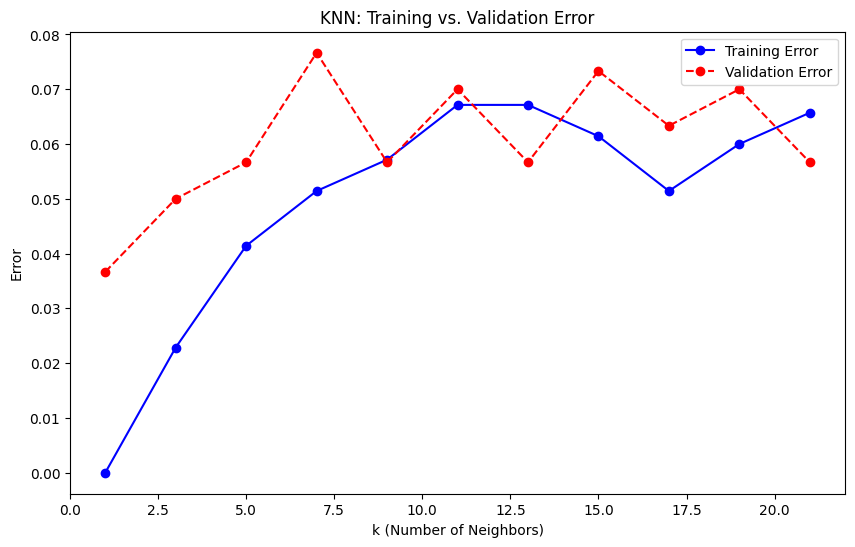

Results for n = 400:
  Training Errors: [0.0, 0.006428571428571406, 0.01499999999999999, 0.018571428571428593, 0.04285714285714284, 0.05642857142857145, 0.07214285714285715, 0.07714285714285715, 0.07785714285714289, 0.07642857142857143, 0.08]
  Validation Errors: [0.009999999999999986, 0.018333333333333358, 0.025, 0.040000000000000015, 0.06333333333333332, 0.075, 0.07833333333333332, 0.08499999999999999, 0.07666666666666666, 0.08, 0.06833333333333332]


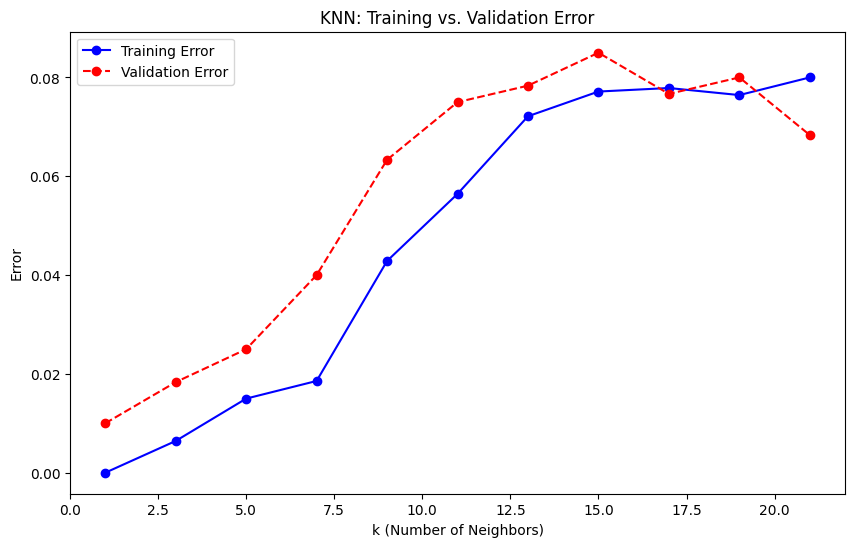

Results for n = 1200:
  Training Errors: [0.0, 0.0, 0.0004761904761904745, 0.002142857142857135, 0.00857142857142854, 0.01595238095238096, 0.03476190476190475, 0.03261904761904762, 0.043809523809523784, 0.04119047619047618, 0.05238095238095242]
  Validation Errors: [0.0, 0.0, 0.0016666666666666607, 0.003888888888888875, 0.019999999999999973, 0.027222222222222214, 0.03500000000000001, 0.04222222222222223, 0.05166666666666666, 0.04388888888888889, 0.05611111111111113]


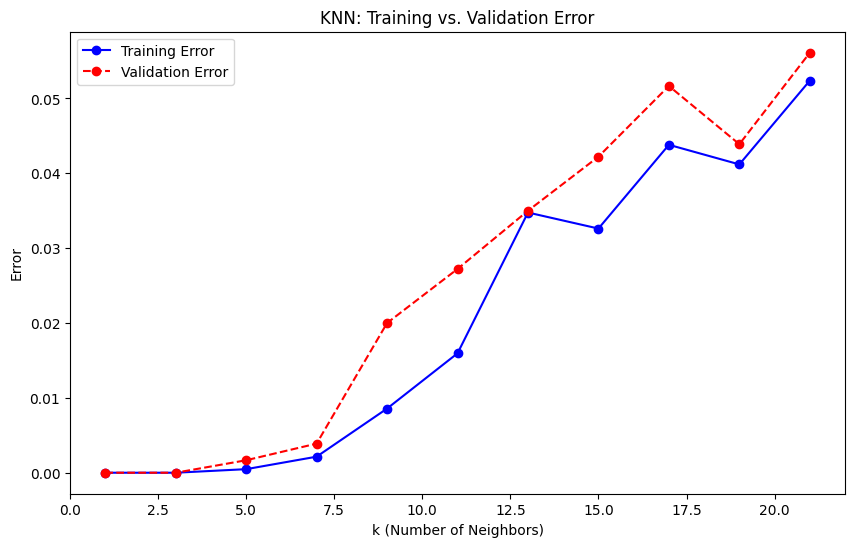


Gaussian Data:
  L1 Accuracy: 88.33%
  L2 Accuracy: 89.17%

Laplacian Data:
  L1 Accuracy: 77.50%
  L2 Accuracy: 77.08%


In [61]:
# Part(d): Influence of training data on KNN classifier

########################################

def performance_with_varying_n(n_values, k_range, rho, X_train, y_train, repetitions=10):
    """Evaluates KNN performance for different training set sizes (n)."""
    results = {}

    for n in n_values:
        subset_indices = np.random.choice(len(X_train), size=n, replace=True)
        X_train_subset = X_train[subset_indices]
        y_train_subset = y_train[subset_indices]
        train_errors, validation_errors = holdoutCVkNN(X_train_subset, y_train_subset, k_range, rho)

        results[n] = {
            'train_errors': train_errors,
            'validation_errors': validation_errors,
        }

    return results


# Performance evaluation for varying n
n_values = [200, 400, 1200]  # Training set sizes to evaluate
k_range = range(1, 22, 2)  # Range of k values
rho = 0.3  # Hold-out fraction
results = performance_with_varying_n(n_values, k_range, rho, X_train, Y_train)

def train_vs_validation_plot(k_range, train_errors, validation_errors):
    """
    Plots training and validation errors for different k values.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, train_errors, label="Training Error", marker='o', linestyle='-', color='b')
    plt.plot(k_range, validation_errors, label="Validation Error", marker='o', linestyle='--', color='r')
    plt.xlabel('k (Number of Neighbors)')
    plt.ylabel('Error')
    plt.title(f'KNN: Training vs. Validation Error')
    plt.legend()
    plt.show()

# Print results and plot performance for each n value
for n, data in results.items():
    print(f"Results for n = {n}:")
    print(f"  Training Errors: {data['train_errors']}")
    print(f"  Validation Errors: {data['validation_errors']}")
    train_vs_validation_plot(k_range, data['train_errors'], data['validation_errors'])

########################################

# Performance evaluation with different data distributions (Gaussian, Laplacian)

########################################

def create_multivariate_laplacian(mean, cov, size):
    """Generates multivariate Laplacian data using NumPy."""
    dim = len(mean)
    standard_laplacian = np.random.laplace(loc=0, scale=1, size=(size, dim))  # Standard Laplacian random variables
    L = np.linalg.cholesky(cov)  # Cholesky decomposition for correlation
    laplacian_data = mean + standard_laplacian @ L  # Scale and shift to desired distribution
    return laplacian_data

# Generate Laplacian-distributed data
X1_lap = create_multivariate_laplacian(mean1, cov, 90)
X2_lap = create_multivariate_laplacian(mean2, cov, 90)
X3_lap = create_multivariate_laplacian(mean3, cov, 90)
X4_lap = create_multivariate_laplacian(mean4, cov, 90)

class1_X_train_lap = np.concatenate((X1_lap[:30], X4_lap[:30]), axis=0)
class1_X_test_lap = np.concatenate((X1_lap[30:], X4_lap[30:]), axis=0)
class2_X_train_lap = np.concatenate((X2_lap[:30], X3_lap[:30]), axis=0)
class2_X_test_lap = np.concatenate((X2_lap[30:], X3_lap[30:]), axis=0)

X_train_lap = np.concatenate((class1_X_train_lap, class2_X_train_lap), axis=0)
X_test_lap = np.concatenate((class1_X_test_lap, class2_X_test_lap), axis=0)
y_train_lap = np.concatenate((np.ones(60), -np.ones(60)))
y_test_lap = np.concatenate((np.ones(120), -np.ones(120)))

# Evaluate KNN Performance on Gaussian and Laplacian Data
knn_l1 = KNeighborsClassifier(n_neighbors=5, distance_metric="l1")
knn_l2 = KNeighborsClassifier(n_neighbors=5, distance_metric="l2")

# Gaussian Data
knn_l1.fit(X_train, Y_train)
knn_l2.fit(X_train, Y_train)
predictions_l1_gaussian = knn_l1.predict(X_test)
predictions_l2_gaussian = knn_l2.predict(X_test)

accuracy_l1_gaussian = KNNAccuracy(Y_test, predictions_l1_gaussian)
accuracy_l2_gaussian = KNNAccuracy(Y_test, predictions_l2_gaussian)

# Laplacian Data
knn_l1.fit(X_train_lap, y_train_lap)
knn_l2.fit(X_train_lap, y_train_lap)
predictions_l1_laplacian = knn_l1.predict(X_test_lap)
predictions_l2_laplacian = knn_l2.predict(X_test_lap)

accuracy_l1_laplacian = KNNAccuracy(y_test_lap, predictions_l1_laplacian)
accuracy_l2_laplacian = KNNAccuracy(y_test_lap, predictions_l2_laplacian)

# Results
print("\nGaussian Data:")
print(f"  L1 Accuracy: {accuracy_l1_gaussian * 100:.2f}%")
print(f"  L2 Accuracy: {accuracy_l2_gaussian * 100:.2f}%")
print("\nLaplacian Data:")
print(f"  L1 Accuracy: {accuracy_l1_laplacian * 100:.2f}%")
print(f"  L2 Accuracy: {accuracy_l2_laplacian * 100:.2f}%")


* KNN works better on Gaussian Data then on Laplacian data.

* Gaussian Data: KNN performs well with L2 distance, but the performance may degrade slightly when switching to L1 distance due to the grid-like decision boundaries.

* Laplacian Data: KNN is more sensitive to noise with L2 distance but may perform better with L1 distance, as it is less influenced by outliers and the sparse nature of the data.

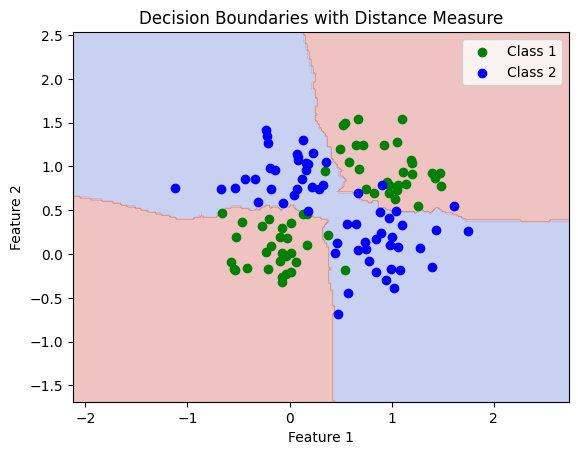

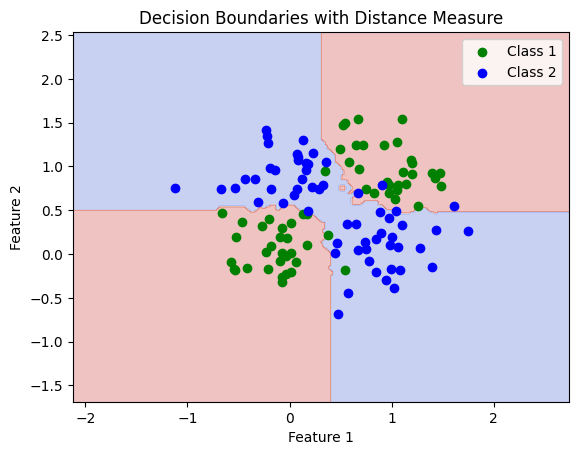

In [62]:
# Part(e): Influence of distance measure on decision regions

def plot_decision_boundary(X_train, Y_train, knn_model):
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X_train[Y_train == 1, 0], X_train[Y_train == 1, 1], c='green', label='Class 1')
    plt.scatter(X_train[Y_train == -1, 0], X_train[Y_train == -1, 1], c='blue', label='Class 2')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundaries with Distance Measure")
    plt.legend()
    plt.show()

# Experiment with L1 and L2 distance metrics
knn_l2 = KNeighborsClassifier(n_neighbors=best_k, distance_metric="l2")
knn_l2.fit(X_train, Y_train)

# L2 distance measure decision boundary
plot_decision_boundary(X_train, Y_train, knn_l2)

# L1 distance measure decision boundary
knn_l1 = KNeighborsClassifier(n_neighbors=best_k, distance_metric="l1")
knn_l1.fit(X_train, Y_train)

plot_decision_boundary(X_train, Y_train, knn_l1)


**Influence of Distance Measure on Decision Regions:**

The distance measure in KNN determines the shape of the decision regions and influences how the algorithm classifies data.

- **L2 Distance (Euclidean):** Produces smooth, circular or spherical decision regions. It's ideal for data where distances are uniformly meaningful.
  
- **L1 Distance (Manhattan):** Results in grid-like, rectangular decision regions. It’s better for data with axis-aligned patterns.

- **Other Measures (e.g., Minkowski, Cosine):** Decision boundaries vary depending on the distance formula. Minkowski generalizes L1 and L2, and Cosine similarity focuses on angular relationships.


### Observations:

- **L2 (Euclidean):** Smooth, continuous decision regions.
- **L1 (Manhattan):** Axis-aligned, rectangular decision regions.


* Distance measures shape KNN’s decision regions, with L2 producing smoother regions and L1 creating more grid-like patterns. The choice of measure depends on data structure and distribution.

In [44]:
# Part(f): MNIST Digit classification using KNN classifier

##################################

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Separate images and targets
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy().astype(int)  # Targets are in string format, so convert them to integers

# Plot a few example images
plt.subplot(211)
plt.imshow(images[0].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# Split data into training (80%), validation (10%), and test (10%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(images, targets, test_size=0.2, random_state=42)
X_valid, X_test, Y_valid, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Print the sizes of the splits
print(f"Training Set: {X_train.shape[0]} samples")
print(f"Validation Set: {X_valid.shape[0]} samples")
print(f"Test Set: {X_test.shape[0]} samples")

# Multi-class KNN Classifier
class MultiClassKNNClassifier:
    def __init__(self, k=3, distance_metric="l2"):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            # Compute distances from test_point to all training points
            distances = self._compute_distances(test_point)
            # Find k-nearest neighbors
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.Y_train[k_nearest_indices]
            # Majority vote
            predicted_label = np.bincount(k_nearest_labels).argmax()
            predictions.append(predicted_label)
        return np.array(predictions)

    def _compute_distances(self, test_point):
        # Euclidean (L2) or Manhattan (L1) distance
        if self.distance_metric == "l2":
            distances = np.linalg.norm(self.X_train - test_point, axis=1)
        elif self.distance_metric == "l1":
            distances = np.sum(np.abs(self.X_train - test_point), axis=1)
        return distances

# Cross-validation function to find best k and distance metric
def cross_validate(X_train, Y_train, X_valid, Y_valid, k_values, distance_metrics):
    best_k = None
    best_distance_metric = None
    best_accuracy = 0

    for metric in distance_metrics:
        for k in k_values:
            # Initialize and train the KNN model
            knn = MultiClassKNNClassifier(k=k, distance_metric=metric)
            knn.fit(X_train, Y_train)
            # Predict on validation set
            predictions = knn.predict(X_valid)
            # Calculate accuracy
            accuracy = np.sum(predictions == Y_valid) / len(Y_valid)
            print(f"Accuracy with k={k} and {metric} distance: {accuracy * 100:.2f}%")
            # Keep track of the best model
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k = k
                best_distance_metric = metric

    print(f"Best k: {best_k}, Best distance metric: {best_distance_metric}")
    return best_k, best_distance_metric

# Evaluate with k values and distance metrics
k_values = [1, 3, 5, 7, 9]
distance_metrics = ["l2", "l1"]
best_k, best_distance_metric = cross_validate(X_train, Y_train, X_valid, Y_valid, k_values, distance_metrics)

# Evaluate performance on the test set with the best hyperparameters
final_knn = MultiClassKNNClassifier(k=best_k, distance_metric=best_distance_metric)
final_knn.fit(X_train, Y_train)

# Predict on test data
test_predictions = final_knn.predict(X_test)

# Calculate accuracy
test_accuracy = np.sum(test_predictions == Y_test) / len(Y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Create confusion matrix
def compute_confusion_matrix(true, pred):
    # Create confusion matrix for multi-class classification
    unique_classes = np.unique(true)
    matrix = np.zeros((len(unique_classes), len(unique_classes)), dtype=int)

    for t, p in zip(true, pred):
        matrix[t][p] += 1

    return matrix

# Compute confusion matrix
conf_matrix = compute_confusion_matrix(Y_test, test_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()



KeyboardInterrupt: 

**Suggestions to Improve Performance:**

1. **Feature Engineering:** Use techniques like PCA (Principal Component Analysis) to reduce dimensionality and retain important features.
  
2. **Scaling:** Ensure that the images are scaled before inputting them into the KNN classifier to avoid issues with varying feature magnitudes.

3. **Hyperparameter Tuning:** Experiment with larger values of **k** and try different distance metrics (e.g., Minkowski distance) to optimize performance.

4. **Data Augmentation:** Enhance the training dataset by generating synthetic data through transformations like rotations, shifts, and flips to improve generalization.



---